# Assignment 2 -- Linear Models

## Abstract

This Assignment is about Linear Models, its analyzes base on the dataset from Lianjia, a major local estate agency in China. 

In Part A, I built a Simple Regression Model between the square and the total price of a house, a Multiple Regression Model between price, subway, constructionTime and communityAverage and a Multiple Regression Model between the square of a house and the number of different rooms. In Part B, I built a Simple Logistic Model between the house's followers and whether a subway station is near the house, a Simple Logistic Model between elevator and floor and a Multivariable Logistic Model about house price and subway in different directions in Beijing. In Part C, there are some extensions on Part A's model. In Part D, I gave two pairs of terms which have synergy effect with each other. And Part E, I did L2 Regularization for the first Linear Model and compared the different between the out of sample performance with non-regularized linear regression.

In [20]:
# Importing libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns
import statsmodels.formula.api as sm
from patsy import dmatrices
from sklearn import metrics
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from statsmodels.stats import diagnostic as dia
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

## Data Preparation

### Load data

Source: All the data was fetching from https://bj.lianjia.com/chengjiao. This dataset is about the housing prices of Beijing, most data is traded in 2011-2017, some of them is traded in Jan,2018, and some is even earlier(2010,2009).[^1]

In [21]:
# Importing the dataset
df = pd.read_csv('lianjia.csv',encoding='latin1')

In [22]:
# Check the first 5 lines
df.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


In [23]:
df=df.reshape(-1,1)

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [24]:
df.describe()

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,318851.000000,318851.000000,3.188510e+05,160874.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,316830.000000,318851.000000,318851.000000,3.188510e+05,318819.000000,318819.000000,318819.000000,318851.000000,318388.000000
mean,116.418459,39.949591,1.129113e+12,28.822339,16.731508,349.030201,43530.436379,83.240597,0.994599,3.009790,2.606330,4.451026,6.316486e+01,0.577055,0.645601,0.601112,6.763564,63682.446305
std,0.112054,0.091983,2.363447e+12,50.237343,34.209185,230.780778,21709.024204,37.234661,0.109609,1.269857,1.311739,1.901753,2.506851e+04,0.494028,0.478331,0.489670,2.812616,22329.215447
min,116.072514,39.627030,1.111027e+12,1.000000,0.000000,0.100000,1.000000,6.900000,0.000000,0.048000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,116.344985,39.893200,1.111027e+12,1.000000,0.000000,205.000000,28050.000000,57.900000,1.000000,1.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46339.000000
50%,116.416780,39.934527,1.111027e+12,6.000000,5.000000,294.000000,38737.000000,74.260000,1.000000,4.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59015.000000
75%,116.477581,40.003018,1.111027e+12,37.000000,18.000000,425.500000,53819.500000,98.710000,1.000000,4.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75950.000000
max,116.732378,40.252758,1.114620e+15,1677.000000,1143.000000,18130.000000,156250.000000,1745.500000,4.000000,4.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


Description of the features: 
* url: the url which fetches the data( character )
* id: the id of transaction( character )
* Lng: and Lat coordinates, using the BD09 protocol. ( numerical )
* Cid: community id( numerical )
* tradeTime: the time of transaction( character )
* DOM: active days on market.( numerical )
* followers: the number of people follow the transaction.( numerical )
* totalPrice: the total price( numerical )
* price: the average price by square( numerical )
* square: the square of house( numerical )
* livingRoom: the number of living room( character )
* drawingRoom: the number of drawing room( character )
* kitchen: the number of kitchen( numerical )
* bathroom the number of bathroom( character )
* floor: the height of the house. I will turn the Chinese characters to English in the next version.( character )
* buildingType: including tower( 1 ) , bungalow( 2 )，combination of plate and tower( 3 ), plate( 4 )( numerical )
* constructionTime: the time of construction( numerical )
* renovationCondition: including other( 1 ), rough( 2 ),Simplicity( 3 ), hardcover( 4 )( numerical )
* buildingStructure: including unknow( 1 ), mixed( 2 ), brick and wood( 3 ), brick and concrete( 4 ),steel( 5 ) and steel-concrete composite ( 6 ).( numerical )
* ladderRatio: the proportion between number of residents on the same floor and number of elevator of ladder. It describes how many ladders a resident have on average.( numerical )
* elevator have ( 1 ) or not have elevator( 0 )( numerical )
* fiveYearsProperty: if the owner have the property for less than 5 years( numerical )

### Clean noneffective values

* Column 'floor' is shown as gibberish because of the Chinese character, so I remove the Chinese character and remian the value of the floor number.
* Column 'url' is too long, but I found we we can extraction the location feature in it, such as https://bj.lianjia.com/chengjiao/101084782030...., the location is 'chengjiao', so I extracte the useful information 'location' from 'url' and drop out the 'url'.

In [25]:
# Replace columns 'url' and 'floor' by 'location' and 'floo'
df.insert(0, 'location', df['url'].str.split('/').str[3])
df.insert(16, 'floo', df['floor'].str.split(' ').str[1])

In [26]:
# Check the first 5 lines of columns 'location' and 'floo'
df[['location', 'floo']].head()

,location,floo
0,chengjiao,26
1,chengjiao,22
2,chengjiao,4
3,chengjiao,21
4,chengjiao,6


In [27]:
# Delete columns 'url' and 'floor'
df.drop(columns = ['url', 'floor'], inplace=True)

In [28]:
# Rename column 'floo' as 'floor'
df = df.rename(columns = {'floo':'floor'})

In [29]:
# Check all columns in dataset
df.columns

Index(['location', 'id', 'Lng', 'Lat', 'Cid', 'tradeTime', 'DOM', 'followers',
       'totalPrice', 'price', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
       'bathRoom', 'floor', 'buildingType', 'constructionTime',
       'renovationCondition', 'buildingStructure', 'ladderRatio', 'elevator',
       'fiveYearsProperty', 'subway', 'district', 'communityAverage'],
      dtype='object')

Now, the values in the dataset are all effective.

### Check for null and missing values

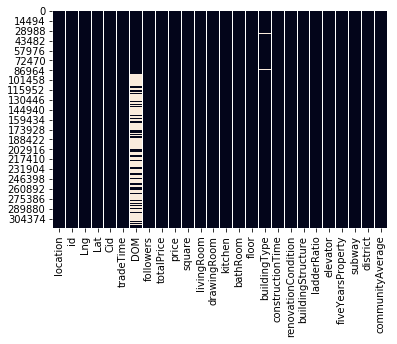

In [30]:
# Show the distribution of null values
sns.heatmap(df.isnull(), cbar=False)

In [31]:
# Check missing values' proportions
total = df.isnull().sum()[df.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(df)*100,2))
pd.concat([total, percent], axis=1, keys=['total_missing', 'percent'])

,total_missing,percent
DOM,157977,49.55
buildingType,2021,0.63
communityAverage,463,0.15
subway,32,0.01
fiveYearsProperty,32,0.01
elevator,32,0.01
floor,32,0.01


* As we can see, there is a large part of the DOM feature missing, so I delete this column.
* And there are only a couple of missing values in other features for which I decide to simply remove the values. Indeed they only account for few rows compared to 300k+ of the entire dataset so the loss is not too big.

In [32]:
# Delete column 'DOM'
df.drop(columns = ['DOM'], inplace=True)

In [33]:
# Delete rows with Null values
df.dropna(axis=0, how='any', inplace=True)

In [34]:
# Check all columns in dataset
df.columns

Index(['location', 'id', 'Lng', 'Lat', 'Cid', 'tradeTime', 'followers',
       'totalPrice', 'price', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
       'bathRoom', 'floor', 'buildingType', 'constructionTime',
       'renovationCondition', 'buildingStructure', 'ladderRatio', 'elevator',
       'fiveYearsProperty', 'subway', 'district', 'communityAverage'],
      dtype='object')

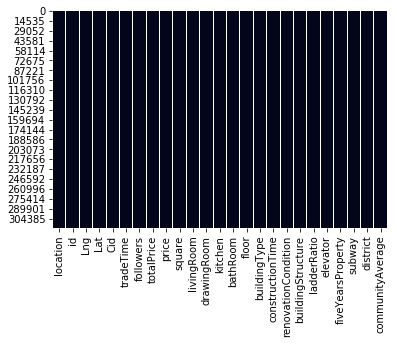

In [35]:
# Check result after delete null values
sns.heatmap(df.isnull(), cbar=False)

### Data types

In [36]:
# Check data types of all columns
print(df.dtypes)

location                object
id                      object
Lng                    float64
Lat                    float64
Cid                      int64
tradeTime               object
followers                int64
totalPrice             float64
price                    int64
square                 float64
livingRoom              object
drawingRoom             object
kitchen                  int64
bathRoom                object
floor                   object
buildingType           float64
constructionTime        object
renovationCondition      int64
buildingStructure        int64
ladderRatio            float64
elevator               float64
fiveYearsProperty      float64
subway                 float64
district                 int64
communityAverage       float64
dtype: object


I convert some datas' type to make it easier to be used.

In [37]:
# Convert data types to int
df[['livingRoom', 'drawingRoom', 'bathRoom', 'floor']] = df[['livingRoom', 
                                                             'drawingRoom', 'bathRoom', 'floor']].astype(int)

In [38]:
df['tradeTime'] = pd.to_datetime(df['tradeTime'])

## Part A - Linear models

In this part, I built a Simple Regression Model between the square and the total price of a house, a Multiple Regression Model between price, subway, constructionTime and communityAverage and a Multiple Regression Model between the square of a house and the number of different rooms. 

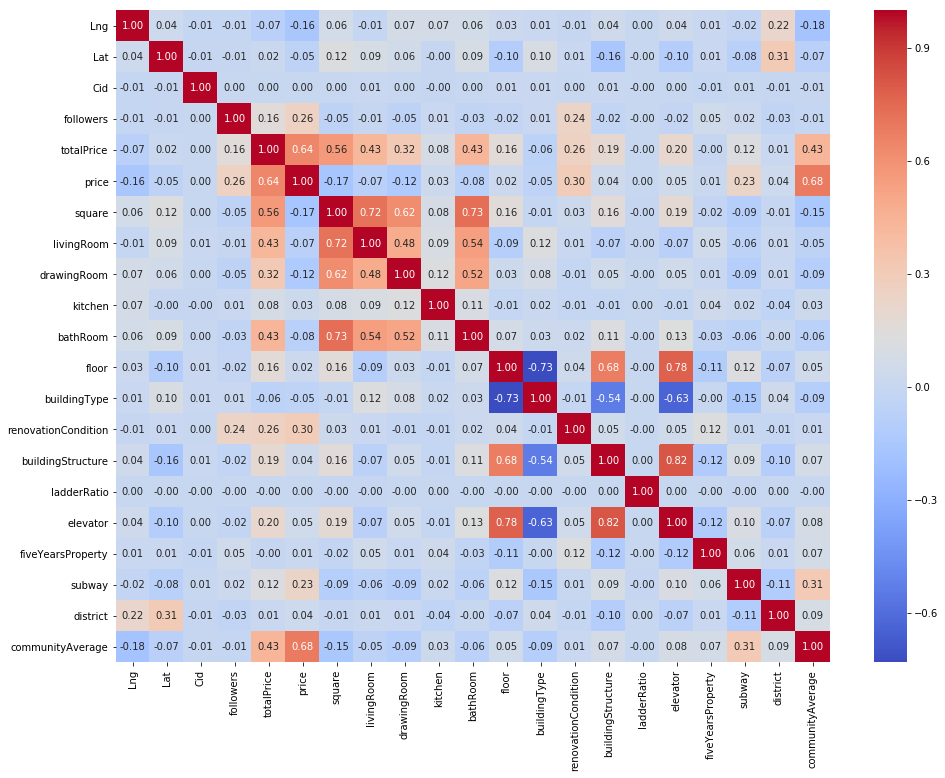

In [19]:
# Show corr of all columns in df
plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

From this plot, we can find that:
* TotalPrice has a strong positive correlation with the communityAverage, meaning prices of homes are higher in dense population area
* TotalPrice has some positive correlation with the number of living room, the number of bath room and the number of drawing room
* As for the square variable, we see that it has a strong correlation with the above variables too: it makes sense since if the home has a large square footage, the chance you can build more room is higher(obvious)

### LM1 - totalPrice vs square

Regressing linear relations between independent variable 'square' and dependent variable 'totalPrice'.

In [20]:
lm1 = df[['totalPrice', 'square']]

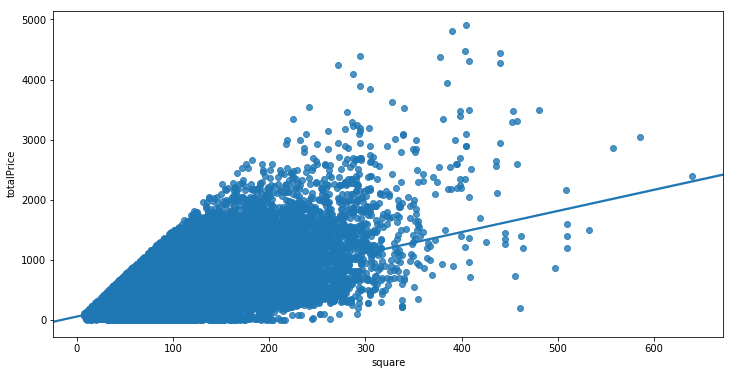

In [21]:
# Show linear relations between x and y
plt.figure(figsize=(12,6))
sns.regplot(y='totalPrice', x='square', data=lm1)
plt.show()

We can get that the total price of the house will be higher when the square is larger.

In [22]:
# Define independent variable and dependent variable
X = lm1[['totalPrice']]
y = lm1[['square']]

# Fit the linear model
lmodel1 = LinearRegression()
results = lmodel1.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

[51.4736899] [[0.0901638]]


We can get that independent variable square has linear relation to totalPrice:

$$y_{totalPrice} = 51.47x_{square} + 0.09 + \varepsilon$$

In [23]:
#dividing data to have a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .4, random_state=0)

In [24]:
# Ridge regression with an alpha of 10
ridge = Ridge(fit_intercept=True, alpha=10)
ridge.fit(X_train,y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [25]:
y_pred = ridge.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

29.69438020966926

In [26]:
# RMSE using 5-fold cross-validation
kf = KFold(n_splits=5)
scores = []
for train, test in kf.split(X):
    lmodel1.fit(X.iloc[train],y.iloc[train])
    scores.append(np.sqrt(metrics.mean_squared_error(y.iloc[test], lmodel1.predict(X.iloc[test]))))
scores

[32.36322009544519,
 38.069669294002246,
 27.005788153317077,
 25.575793682193638,
 28.430443445666153]

In [27]:
def show_stats(m, ncv, cv):
  print('Method: %s' %m)
  print('RMSE on no CV training: %.3f' %ncv)
  print('RMSE on 5-fold CV: %.3f' %cv)

In [28]:
show_stats('Ridge Regression',rmse ,np.mean(scores))

Method: Ridge Regression
RMSE on no CV training: 29.694
RMSE on 5-fold CV: 30.289


In [29]:
#Select the best alpha
ridgecv = RidgeCV(alphas=np.linspace(.01,30,50))
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

29.38795918367347

In [30]:
# Ridge regression with the best alpha
ridge = Ridge(fit_intercept=True, alpha=29.38795918367347)
ridge.fit(X_train,y_train)
print (results.intercept_, results.coef_)

[51.77253467] [[0.09025505]]


Text(0.5, 1.0, 'Ridge Regression - Prices vs Predicted prices: $Y_i$ vs $\\hat{y}_i$')

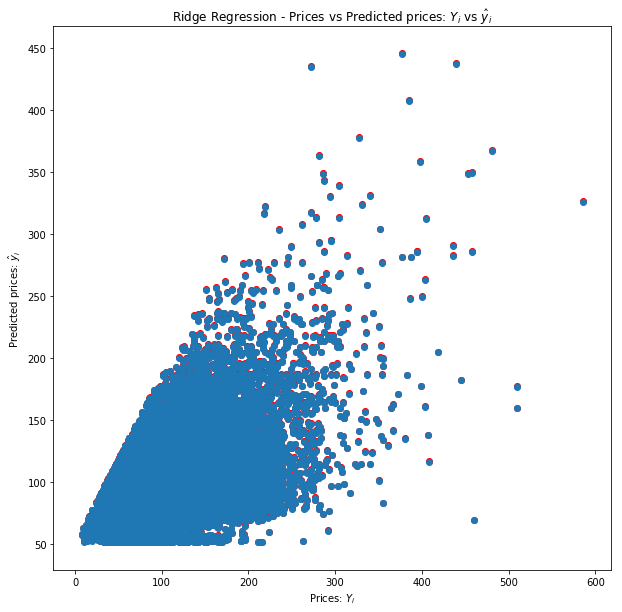

In [31]:
plt.figure(figsize=(10,10))
y_pre = lmodel1.predict(X_test)
plt.scatter(y_test, y_pre, c='r')
y_pred = ridge.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{y}_i$")
plt.title("Ridge Regression - Prices vs Predicted prices: $Y_i$ vs $\hat{y}_i$")

In the plot, I designed the color of the output without Regularization as red. However, just as we can see in the plot, there is not much differences between them. Because my dataset has 300k+ samples, so it doesn't overfit seriously, so regularization only make a little influence.

### LM2 - communityAverage vs  price+subway+constructionTime

LM2 is the model between price, subway, constructionTime and communityAverage. In this model, there are three independent variables, price is a continuous variable, subway is a binary categorical variable and I will convert constructionTime to be a multi-class categorical variable.

This is the main model in Part A, and I will use it to answer follow questions in 3.4 

In [32]:
# Extract features from df
lm2 = df[['communityAverage', 'price', 'subway', 'constructionTime', 'district']]

In [33]:
# show the first 5 lines
lm2.head()

,communityAverage,price,subway,constructionTime,district
0,56021.0,31680,1.0,2005,7
1,71539.0,43436,0.0,2004,7
2,48160.0,52021,0.0,2005,7
3,51238.0,22202,0.0,2008,6
4,62588.0,48396,1.0,1960,1


In [34]:
# show counts of every constructionTime
lm2['constructionTime'].value_counts()

2004    21003
2003    19252
Î´Öª    18747
2005    18734
2006    14739
2007    14126
2000    13809
2002    12287
2008    12095
2009    11506
1998    11281
2001    10525
1999    10163
1996     9042
1995     9042
1992     8472
1990     8368
1994     7713
2010     7213
1993     6746
1997     6442
1988     5557
1989     5482
2011     5422
2012     4982
1987     4923
1986     4850
1985     4693
1991     4306
1984     3344
        ...  
1978      731
1977      501
2015      445
1976      437
1975      382
1970      280
1965      190
1974      178
1960      175
1973      167
1958      124
1964      103
1966       93
1963       89
2016       82
1956       77
1967       73
1957       66
1955       61
1954       61
1959       49
1972       32
1962       21
1953       13
1950       11
1971        8
1961        8
1952        5
1968        4
1969        4
Name: constructionTime, Length: 67, dtype: int64

* There is some erro value "Î´Öª" in coloum constructionTime, I will delete these rows.
* I will divide constructionTime to three parts and sign different values for them, the n it will be a multi-class categorical variable.

In [35]:
# Delete rows with the value 'Î´Öª'in column 'constructionTime'
lm2 = lm2[lm2.constructionTime != 'Î´Öª']

In [36]:
# Convert 'constructionTime' to int
lm2[['constructionTime']] = lm2[['constructionTime']].astype(int)

In [37]:
# Divide 'constructionTime' into 3 parts
lm2.loc[(lm2['constructionTime'] <= 1990), 'constructionTime']= 1
lm2.loc[(lm2['constructionTime'] > 1990) & (lm2['constructionTime'] <= 2000), 'constructionTime']= 2
lm2.loc[(lm2['constructionTime'] > 2000), 'constructionTime']= 3

In [38]:
# Show counts of every part in 'constructionTime
lm2['constructionTime'].value_counts()

3    156756
2     87016
1     53929
Name: constructionTime, dtype: int64

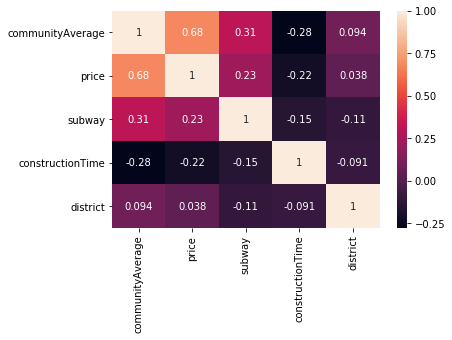

In [39]:
# Show corr of all columns in lm2
sns.heatmap(lm2.corr(), annot=True)

In [40]:
# Creat dummy variables for constructionTime
dummy_ct = pd.get_dummies(lm2['constructionTime'], prefix='constructionTime')
dummy_ct.head()

,constructionTime_1,constructionTime_2,constructionTime_3
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0


Because constructionTime has three types, so we add two dummy variables of them into our model. Because the sum of these three dummy variable is one, so add all three dummy variables will make it multi-colinearity, .

In [41]:
# Creat dataset include dummy variables
keep = ['communityAverage', 'price', 'subway']
lm2_dummy = lm2[keep].join(dummy_ct.ix[:, 'constructionTime_2':])
lm2_dummy.head()

,communityAverage,price,subway,constructionTime_2,constructionTime_3
0,56021.0,31680,1.0,0,1
1,71539.0,43436,0.0,0,1
2,48160.0,52021,0.0,0,1
3,51238.0,22202,0.0,0,1
4,62588.0,48396,1.0,0,0


In [42]:
# Fit the model
lmodel2 = sm.ols('communityAverage ~ price + subway + constructionTime_2 + constructionTime_3', lm2_dummy).fit()
lmodel2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.801e+04,103.271,368.074,0.000,3.78e+04,3.82e+04
price,0.6279,0.001,456.884,0.000,0.625,0.631
subway,6885.7672,60.191,114.399,0.000,6767.795,7003.739
constructionTime_2,-6285.0697,86.604,-72.573,0.000,-6454.810,-6115.329
constructionTime_3,-7870.8896,80.227,-98.108,0.000,-8028.132,-7713.648


We can get the relationship:

$$y_{communityAverage} = 0.63x_{price} + 6885.77x_{subway} + -6285.07x_{constructionTime_2} + -7870.89x_{constructionTime_3	} + 3.80 * 10^4 + \varepsilon$$

### LM3 - square vs livingRoom+drawingRoom+bathRoom

This part makes Multiple Regression Models between independent variables 'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom' and dependent variable 'square', and build the most appropriate model of different rooms' amounts and the houses' whole square.

In [43]:
# Chose related variables to dataset lm3
lm3 = df[['square', 'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom']]

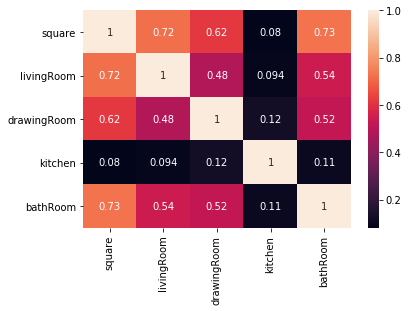

In [44]:
# Show corr of all columns in lm3
sns.heatmap(lm3.corr(), annot=True)

In next steps, I use forward selection method to try different combinations among four independent variables, then select the best model out of all of the models. I used RSS and R^2 as selection criteria, models with the lowest RSS and the highest R^2 will be selected as the best model in every round.

In [45]:
# Define evaluate criteria
def evaluateModel (model):
    print("RSS = ", ((lm3.square - model.predict())**2).sum())
    print("R2 = ", model.rsquared)

In [46]:
# Fit a regression model using the Ordinary Least Square algorithm
modelLR = sm.ols('square ~ livingRoom', lm3).fit()
modelLR.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,15.2057,0.124,122.989,0.000,14.963,15.448
livingRoom,33.7358,0.058,585.778,0.000,33.623,33.849


In [47]:
evaluateModel(modelLR)

RSS =  195773574.8319369
R2 =  0.5202326868530407


In [48]:
modelDR = sm.ols('square ~ drawingRoom', lm3).fit()
modelDR.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,32.9217,0.124,265.382,0.000,32.679,33.165
drawingRoom,42.6724,0.097,440.146,0.000,42.482,42.862


In [49]:
evaluateModel(modelDR)

RSS =  253106995.2041047
R2 =  0.37973006248663455


In [50]:
modelKC = sm.ols('square ~ kitchen', lm3).fit()
modelKC.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,55.1015,0.616,89.458,0.000,53.894,56.309
kitchen,27.8868,0.616,45.274,0.000,26.680,29.094


In [51]:
evaluateModel(modelKC)

RSS =  405433308.7975339
R2 =  0.006435626518768611


In [52]:
modelBR = sm.ols('square ~ bathRoom', lm3).fit()
modelBR.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.7855,0.129,75.689,0.000,9.532,10.039
bathRoom,61.7027,0.103,600.304,0.000,61.501,61.904


In [53]:
evaluateModel(modelBR)

RSS =  190790179.5051263
R2 =  0.5324451122957774


modelB is the best model in the first round.

In [54]:
modelBL = sm.ols('square ~ bathRoom + livingRoom', lm3).fit()
modelBL.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-8.4831,0.116,-72.876,0.000,-8.711,-8.255
bathRoom,40.5791,0.101,403.202,0.000,40.382,40.776
livingRoom,21.5873,0.056,387.786,0.000,21.478,21.696


In [55]:
evaluateModel(modelBL)

RSS =  129330768.52234338
R2 =  0.6830589860022627


In [56]:
modelBK = sm.ols('square ~ bathRoom + kitchen', lm3).fit()
modelBK.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,8.8083,0.430,20.504,0.000,7.966,9.650
bathRoom,61.6766,0.103,596.674,0.000,61.474,61.879
kitchen,1.0135,0.425,2.385,0.017,0.181,1.846


In [57]:
evaluateModel(modelBK)

RSS =  190786749.664122
R2 =  0.5324535175445679


In [58]:
modelBD = sm.ols('square ~ bathRoom + drawingRoom', lm3).fit()
modelBD.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.3409,0.124,2.749,0.006,0.098,0.584
bathRoom,47.4363,0.110,431.767,0.000,47.221,47.652
drawingRoom,22.5132,0.090,250.226,0.000,22.337,22.690


In [59]:
evaluateModel(modelBD)

RSS =  159275270.13827956
R2 =  0.6096762881783329


modelBL is the best model in the second model.

In [60]:
modelBLD = sm.ols('square ~ bathRoom + livingRoom + drawingRoom', lm3).fit()
modelBLD.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-12.2910,0.112,-109.287,0.000,-12.511,-12.071
bathRoom,33.9683,0.102,332.863,0.000,33.768,34.168
livingRoom,18.7227,0.055,339.826,0.000,18.615,18.831
drawingRoom,14.8557,0.080,185.142,0.000,14.698,15.013


In [61]:
evaluateModel(modelBLD)

RSS =  116690647.58653297
R2 =  0.7140351627637707


In [62]:
modelBLK = sm.ols('square ~ bathRoom + livingRoom + kitchen', lm3).fit()
modelBLK.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-3.7185,0.355,-10.473,0.000,-4.414,-3.023
bathRoom,40.6732,0.101,403.391,0.000,40.476,40.871
livingRoom,21.6222,0.056,388.158,0.000,21.513,21.731
kitchen,-4.9725,0.350,-14.203,0.000,-5.659,-4.286


In [63]:
evaluateModel(modelBLK)

RSS =  129248371.55882825
R2 =  0.6832609099331663


modelBLD is the best model in the third round.

In [64]:
modelAll = sm.ols('square ~ livingRoom + drawingRoom + kitchen + bathRoom', lm3).fit()

In [65]:
evaluateModel(modelAll)

RSS =  116395384.54295488
R2 =  0.7147587413019398


Although modelAll is slightly better than modelBLD, but R^2 always increases when adding new variables.[^2] On the other hand, we can find that kitchen is not an appropriate variable in the first round which built models by single independent variable. So I choose modelBLD as the final Multiple Regression Model:

$$y_{square} = 33.9683x_{bathRoom} + 18.7227x_{livingRoom} + 14.8557x_{drawingRoom} - 12.2910 + \varepsilon$$

### Questions

#### Is the relationship significant?  
Yes. 

We can learn from the metrics in tables below.  F-statistic is much larger than 1, all p-values are below 0.05 and t-statistic is high, so each individual predictor is related to the response and this is a significant relationship.

In [66]:
# Show all metrics of modelBLD in one single table
lmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       communityAverage   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                 7.666e+04
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        13:47:23   Log-Likelihood:            -3.2959e+06
No. Observations:              297701   AIC:                         6.592e+06
Df Residuals:                  297696   BIC:                         6.592e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           3.801e+04    103.271    368.074      0.000    3.78e+04    3.82e+04
price                  0.6279      0.001    456.884      0.000       0.625       0.631
subway              6885.7672     60.191    114.399      0.000    6767.795    7003.739
constructionTime_2 -6285.0697     86.604    -72.573      0.000   -6454.810   -6115.329
constructionTime_3 -7870.8896     80.227    -98.108      0.000   -8028.132   -7713.648
==============================================================================
Omnibus:                    49804.626   Durbin-Watson:                   0.705
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           103672.884
Skew:                           1.004   Prob(JB):                         0.00
Kurtosis:                       5.079   Cond. No.                     2.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Are any model assumptions violated? <br>
##### A linear relationship between outcome and predictor variables<br>
  we have gotten the equation: $$y_{communityAverage} = 0.63x_{price} + 6885.77x_{subway} + -6285.07x_{constructionTime_2} + -7870.89x_{constructionTime_3	} + 3.80 * 10^4 + \varepsilon$$ So this is a linear relationship.<br>
  Relationships between other variables are shown as the pairplot below.

##### The error term has some assumptions

We can get the Durbin-Watson value in the summary of lmodel2's metrics, it is approximately two means the <b>statistical independence</b> of the errors.

In [67]:
# Output the mean of residuals
print('Residual mean:', np.mean(lmodel2.resid))

Residual mean: 9.211835162786264e-07


The <b>mean of residuals</b> is approximately zero.

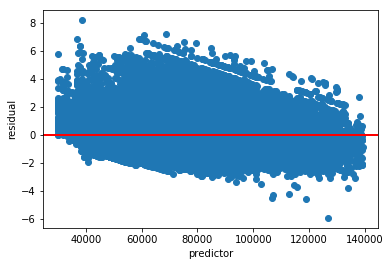

In [68]:
# Plot distribution of residuals and predictors 
plt.scatter(lmodel2.predict(), (lmodel2.resid-lmodel2.resid.mean())/lmodel2.resid.std())
plt.xlabel('predictor')
plt.ylabel('residual')

# Add reference line
plt.axhline(y = 0, color = 'r', linewidth = 2)
plt.show()

This plot shows that the residuals' variance doesn't increase with predictors, so errors has <b>homoscedasticity</b>.

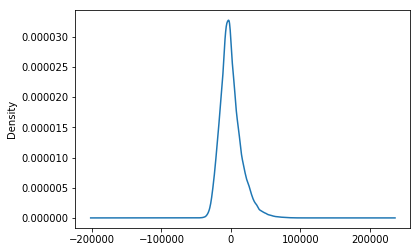

In [69]:
# Plot normally distribution of residuals 
plt.figure()
lmodel2.resid.plot.density()
plt.show()

The residuals is <b>normally distributed</b>.

In [70]:
# Output VIF Factors of independent variables in modelBLD
y, X = dmatrices('communityAverage ~ price + subway + constructionTime_2 + constructionTime_3', data = lm2_dummy, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,13.116173,Intercept
1,1.102734,price
2,1.067522,subway
3,1.908057,constructionTime_2
4,1.973322,constructionTime_3


All VIF Factors of independent variables are under 10, so there is <b>no Multicollinearity</b> in lmodel2.

#### Does the model make sense? Interpret the meaning of each independent variable.
 * communityAverage: the population in one area,
 * price: the average price by square,
 * constructionTime: the time of construction,
 * subway: is there any subway station near the house.
 
The model makes sense, and it is accord with the situation in China. An area with subway nearby, high price and old houses always in a dense population and in the central city.

#### Cross-validate the model. How well did it do? 

In [71]:
# Cross validate
a = lm2_dummy[lm2_dummy.columns[[1,2,3,4]]].values
b = lm2_dummy[lm2_dummy.columns[:1]].values
cv = 9
lin = LinearRegression()
scores = cross_val_score(lin, a, b, cv=cv, scoring='r2')
print(scores)
print(scores.mean())
print("mean R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.69242245 -0.00209215  0.28640899  0.34963897  0.37483718  0.40364675
  0.25248972  0.59074529  0.22748626]
0.35284260795905603
mean R2: 0.35 (+/- 0.38)


According to the value of R2, this generally considered a Moderate effect size.

#### Compare the AIC, BIC and adjusted R^2.  Do they agree in their ranking of the models?<br>
Yes, but my AIC and BIC is a little bigger, maybe because of my large volume data.

## Part B - Logistic models

In this part, I built a Simple Logistic Model between the house's followers and whether a subway station is near the house, a Simple Logistic Model between elevator and floor and a Multivariable Logistic Model about house price and subway in different directions in Beijing.

### LM4 -  subway vs followers

LM4 is the logical model between subway and followers. And the subway is dependent variable and followers is independent variable.

In [39]:
# Chose related variables to dataset m1
lm4 = df[['followers', 'subway']] 
lm4.head()

,followers,subway
0,106,1.0
1,126,0.0
2,48,0.0
3,138,0.0
4,286,1.0


In [40]:
# Adding intercept manually
lm4['intercept'] = 1.0
lm4.head()

,followers,subway,intercept
0,106,1.0,1.0
1,126,0.0,1.0
2,48,0.0,1.0
3,138,0.0,1.0
4,286,1.0,1.0


In [41]:
pred=['followers','intercept']
pred

['followers', 'intercept']

In [42]:
lmodel4 = sm.Logit(lm4['subway'], lm4[pred]).fit()
lmodel4.summary()

Optimization terminated successfully.
         Current function value: 0.671729
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 subway   No. Observations:               316448
Model:                          Logit   Df Residuals:                   316446
Method:                           MLE   Df Model:                            1
Date:                Tue, 23 Apr 2019   Pseudo R-squ.:               0.0002904
Time:                        15:09:41   Log-Likelihood:            -2.1257e+05
converged:                       True   LL-Null:                   -2.1263e+05
                                        LLR p-value:                 1.079e-28
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
followers      0.0012      0.000     10.951      0.000       0.001       0.001
intercept      0.3964      0.004     97.649      0.000       0.388       0.404
==============================================================================
"""

In [76]:
lmodel4.conf_int()

,0,1
followers,0.000996,0.001430
intercept,0.388482,0.404396


In [77]:
np.exp(lmodel4.params.astype(int))

followers    1.0
intercept    1.0
dtype: float64

In [78]:
params = lmodel4.params
conf = lmodel4.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OddsRatio']
np.exp(conf)

,2.5%,97.5%,OddsRatio
followers,1.000996,1.001431,1.001214
intercept,1.474740,1.498397,1.486522


We can get that the house near to subway have more followers.

### LM5 - elevator vs floor

LM5 is the logical model between elevator and elevator. And the floor is dependent variable and elevator is independent variable.

In [79]:
# Chose related variables to dataset m1
lm5 = df[['floor', 'elevator']] 
lm5.head()

,floor,elevator
0,26,1.0
1,22,1.0
2,4,1.0
3,21,1.0
4,6,0.0


In [80]:
# Adding intercept manually
lm5['intercept'] = 1.0
lm5.head()

,floor,elevator,intercept
0,26,1.0,1.0
1,22,1.0,1.0
2,4,1.0,1.0
3,21,1.0,1.0
4,6,0.0,1.0


In [81]:
pred5=['floor','intercept']
pred5

['floor', 'intercept']

In [82]:
lmodel5 = sm.Logit(lm5['elevator'], lm5[pred5]).fit()
lmodel5.summary()

Optimization terminated successfully.
         Current function value: 0.185433
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               elevator   No. Observations:               316448
Model:                          Logit   Df Residuals:                   316446
Method:                           MLE   Df Model:                            1
Date:                Tue, 16 Apr 2019   Pseudo R-squ.:                  0.7274
Time:                        13:53:41   Log-Likelihood:                -58680.
converged:                       True   LL-Null:                   -2.1529e+05
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
floor          0.7724      0.003    238.388      0.000       0.766       0.779
intercept     -7.0036      0.026   -267.688      0.000      -7.055      -6.952
==============================================================================

Possibly complete quasi-separation: A fraction 0.22 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [83]:
lmodel5.conf_int()

,0,1
floor,0.766027,0.778727
intercept,-7.054852,-6.952294


In [84]:
np.exp(lmodel5.params.astype(int))

floor        1.000000
intercept    0.000912
dtype: float64

In [85]:
params = lmodel5.params
conf = lmodel5.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OddsRatio']
np.exp(conf)

,2.5%,97.5%,OddsRatio
floor,2.151202,2.178697,2.164906
intercept,0.000863,0.000956,0.000909


We can get that there will be a higher probability to have elevator when the apartment at a higher floor.

### LM6 - subway vs price+communityAverage+district

LM6 is the model between price, communityAverage, district and subway. In this model, there are three independent variables, communityAverage is a continuous variable, district is a multi-class categorical variable and I will convert price to be a binary categorical variable.

This is the main model in Part B, and I will use it to answer follow questions in 4.4

In [86]:
# Chose related variables to dataset m1
lm6 = df[['subway', 'price','communityAverage','district']] 
lm6.head()

,subway,price,communityAverage,district
0,1.0,31680,56021.0,7
1,0.0,43436,71539.0,7
2,0.0,52021,48160.0,7
3,0.0,22202,51238.0,6
4,1.0,48396,62588.0,1


In [87]:
# Convert price to be a binary categorical variable
lm6['price'] = np.where(lm6['price'] > 30000,'0','1')
lm6[['price']] = lm6[['price']].astype(int)

In [88]:
# Creat dummy variables for district
dummy_d = pd.get_dummies(lm6['district'], prefix='district')
dummy_d.head()

,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_13
0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0


In [89]:
# Creat dataset include dummy variables
keep2 = ['subway', 'communityAverage', 'price']
lm6_dummy = lm6[keep2].join(dummy_d.ix[:, 'district_2':])
lm6_dummy.head()

,subway,communityAverage,price,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_13
0,1.0,56021.0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.0,71539.0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0.0,48160.0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0.0,51238.0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,1.0,62588.0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [90]:
# Adding intercept manually
lm6_dummy['intercept'] = 1.0
lm6_dummy.head()

,subway,communityAverage,price,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_13,intercept
0,1.0,56021.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0
1,0.0,71539.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0
2,0.0,48160.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0
3,0.0,51238.0,1,0,0,0,0,1,0,0,0,0,0,0,0,1.0
4,1.0,62588.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0


In [91]:
pred = lm6_dummy.columns[1:]
pred

Index(['communityAverage', 'price', 'district_2', 'district_3', 'district_4',
       'district_5', 'district_6', 'district_7', 'district_8', 'district_9',
       'district_10', 'district_11', 'district_12', 'district_13',
       'intercept'],
      dtype='object')

In [92]:
lm6_model = sm.Logit(lm6_dummy['subway'], lm6_dummy[pred]).fit()
lm6_model.summary()

Optimization terminated successfully.
         Current function value: 0.590711
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 subway   No. Observations:               316448
Model:                          Logit   Df Residuals:                   316433
Method:                           MLE   Df Model:                           14
Date:                Tue, 16 Apr 2019   Pseudo R-squ.:                  0.1209
Time:                        14:00:01   Log-Likelihood:            -1.8693e+05
converged:                       True   LL-Null:                   -2.1263e+05
                                        LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
communityAverage  3.424e-05   3.72e-07     92.003      0.000    3.35e-05     3.5e-05
price               -0.2445      0.010    -25.108      0.000      -0.264      -0.225
district_2          -1.0862      0.035    -30.652      0.000      -1.156      -1.017
district_3          -1.1491      0.053    -21.503      0.000      -1.254      -1.044
district_4          -1.3773      0.038    -35.897      0.000      -1.452      -1.302
district_5          -1.2532      0.054    -23.354      0.000      -1.358      -1.148
district_6          -1.3002      0.036    -35.827      0.000      -1.371      -1.229
district_7          -0.9874      0.033    -29.592      0.000      -1.053      -0.922
district_8          -1.9003      0.034    -56.668      0.000      -1.966      -1.835
district_9          -2.4014      0.040    -60.219      0.000      -2.480      -2.323
district_10         -1.9487      0.035    -56.008      0.000      -2.017      -1.881
district_11         -1.7484      0.039    -44.785      0.000      -1.825      -1.672
district_12         -7.6274      0.708    -10.767      0.000      -9.016      -6.239
district_13         -1.7869      0.042    -42.302      0.000      -1.870      -1.704
intercept           -0.2680      0.044     -6.034      0.000      -0.355      -0.181
====================================================================================
"""

In [93]:
lm6_model.conf_int()

,0,1
communityAverage,0.000034,0.000035
price,-0.263548,-0.225381
district_2,-1.155635,-1.016730
district_3,-1.253884,-1.044396
district_4,-1.452479,-1.302079
district_5,-1.358327,-1.147991
district_6,-1.371321,-1.229063
district_7,-1.052820,-0.922019
district_8,-1.966044,-1.834592
district_9,-2.479563,-2.323245


In [94]:
np.exp(lm6_model.params)

communityAverage    1.000034
price               0.783124
district_2          0.337502
district_3          0.316909
district_4          0.252264
district_5          0.285601
district_6          0.272479
district_7          0.372537
district_8          0.149521
district_9          0.090591
district_10         0.142460
district_11         0.174050
district_12         0.000487
district_13         0.167473
intercept           0.764898
dtype: float64

In [95]:
params = lm6_model.params
conf = lm6_model.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OddRatio']
np.exp(conf)

,2.5%,97.5%,OddRatio
communityAverage,1.000034,1.000035,1.000034
price,0.768321,0.798212,0.783124
district_2,0.314857,0.361776,0.337502
district_3,0.285394,0.351904,0.316909
district_4,0.233989,0.271966,0.252264
district_5,0.257090,0.317274,0.285601
district_6,0.253771,0.292567,0.272479
district_7,0.348952,0.397715,0.372537
district_8,0.140010,0.159679,0.149521
district_9,0.083780,0.097955,0.090591


### Questions

#### Is the relationship significant?
Yes. 

We can find in the summery that all these variable's have P>|z|<.05, so the relationship of this logistic regression is significant.

#### Are any model assumptions violated?
No. The dependent variable 'subway' is binary type, the sample size is large enough, and we can learn from the data analyze that these variables are independent with each other.

#### Does the model make sense?  Interpret the meaning of each independent variable.
  * price: the average price by square.
  * subway: is there any subway station near the house.
  * district: the no. of each district.
  * communityAverage: the mean price of the same community.

The model makes sense, and it is accord with the situation in China. An area with subway nearby always has high price and in a dense population, and the better the district developed, the higher probability the area has subway.

#### Cross-validate the model. How well did it do? 

In [96]:
# Cross validate
a = lm6_dummy[lm6_dummy.columns[1:]].values
b = lm6_dummy[lm6_dummy.columns[0]].values
cv = 9
log = LogisticRegression()
scores = cross_val_score(log, a, b, cv=cv, scoring='r2')
print(scores)
print(scores.mean())
print("mean R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[-0.65936763 -0.65936763 -0.65936763 -0.65932043 -0.65932043 -0.65935155
 -0.65935155 -0.65935155 -0.65935155]
-0.6593499942645973
mean R2: -0.66 (+/- 0.00)


According to the value of R2, this generally considered a Strong effect size,

#### Calculate the probability of getting the dependent variable

$$P_{Subway} = \frac{e^{3.42*10^-5x_{ca} - 0.24x_{price} - 1.09x_{d2} - 1.15x_{d3} - 1.38x_{d4} -1.25x_{d5} - 1.30x_{d6} - 0.99x_{d7} - 1.90x_{d8} - 2.40x_{d9} - 1.95{d10} - 1.75{d11} - 7.63{d12} - 1.79{d13} - 0.27}}{1 + e^{3.42*10^-5x_{ca} - 0.24x_{price} - 1.09x_{d2} - 1.15x_{d3} - 1.38x_{d4} -1.25x_{d5} - 1.30x_{d6} - 0.99x_{d7} - 1.90x_{d8} - 2.40x_{d9} - 1.95{d10} - 1.75{d11} - 7.63{d12} - 1.79{d13} - 0.27}}$$

For Example:

In [97]:
lm6.head()

,subway,price,communityAverage,district
0,1.0,0,56021.0,7
1,0.0,0,71539.0,7
2,0.0,0,48160.0,7
3,0.0,1,51238.0,6
4,1.0,0,62588.0,1


For the first sample in the dataset, the probability of with subway nearby is:
$$P_{Subway} = \frac{e^{3.42*10^-5 * 56021 - 0.99 - 0.27}}{1 + e^{3.42*10^-5 * 56021 - 0.99 - 0.27}} = 65.83\%$$

## Part C - Multi-colinearity and step-wise regression

### Is there any multi-colinearity in the model?   

In [98]:
# Output VIF Factors of independent variables in modelBLD
y, X = dmatrices('communityAverage ~ price + subway + constructionTime_2 + constructionTime_3', data = lm2_dummy, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,13.116173,Intercept
1,1.102734,price
2,1.067522,subway
3,1.908057,constructionTime_2
4,1.973322,constructionTime_3


All VIF Factors of independent variables are under 10, so there is no Multicollinearity in LM2.

### In the multiple regression models are predictor variables independent of all the other predictor variables? 
Yes，as we can see the heatmap, the correlation between any two predictor variables in the multiple models are very below, so they are independent with each other.

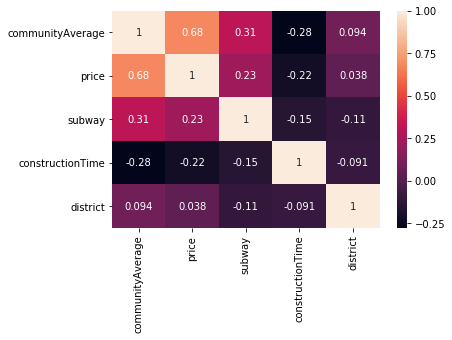

In [99]:
# Show corr of all columns in x
sns.heatmap(lm2.corr(), annot=True)

### In multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model. <br>
I did this in Part A - LM3, I assumed four indepentend variables at start, and I use forward selection method to try different combinations among four independent variables, then select the best model out of all of the models.

I dropped variable 'kitchen', and use the other three variables for the final model. The rank of them is: 'bathRoom', 'livingRoom' and 'drawingRoom'.

### Cross-validate the models. How well did they do?

In [100]:
# Cross validate include the insignificant ones
a = lm3[lm3.columns[[1,2,3,4]]].values
b = lm3[lm3.columns[:1]].values
cv = 20
lin = LinearRegression()
scores = cross_val_score(lin, a, b, cv=cv)
print(scores)
print(scores.mean())
print("mean R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.7225702  0.73238227 0.71592439 0.70127806 0.69743857 0.70510202
 0.6808429  0.71958334 0.69803355 0.72039808 0.71763611 0.72151378
 0.67558987 0.6355942  0.72688785 0.70896821 0.71398867 0.67712805
 0.67667447 0.6828313 ]
0.7015182934778474
mean R2: 0.70 (+/- 0.05)


In [101]:
# Cross validate exclude the insignificant ones
a = lm3[lm3.columns[[1,2,3,4]]].values
b = lm3[lm3.columns[:1]].values
cv = 20
lin = LinearRegression()
scores = cross_val_score(lin, a, b, cv=cv)
print(scores)
print(scores.mean())
print("mean R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.7225702  0.73238227 0.71592439 0.70127806 0.69743857 0.70510202
 0.6808429  0.71958334 0.69803355 0.72039808 0.71763611 0.72151378
 0.67558987 0.6355942  0.72688785 0.70896821 0.71398867 0.67712805
 0.67667447 0.6828313 ]
0.7015182934778474
mean R2: 0.70 (+/- 0.05)


We can see that there is no much difference in R2 between the model include the insignificant feature and the model exclude the insignificant feature.

## Part D - Interaction effects

An interaction effect is the simultaneous effect of two or more independent variables on at least one dependent variable in which their joint effect is significantly greater (or significantly less) than the sum of the parts.

### 'bathRoom' & 'livingRoom'

The first pair of terms which have synergy effect is 'bathRoom' and 'livingRoom'. As we all know, if a house has more living rooms, it can accommodate more people to live in, then the plan of bath room should be increased as well to fit the necessary. So the number of living rooms and bath rooms have synergy effect.

In [106]:
modelSynergy1 = sm.ols('square ~ bathRoom + livingRoom + drawingRoom + bathRoom * livingRoom', lm3).fit()
modelSynergy1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,15.0591,0.304,49.487,0.000,14.463,15.655
bathRoom,9.2631,0.275,33.679,0.000,8.724,9.802
livingRoom,8.5063,0.119,71.497,0.000,8.273,8.740
drawingRoom,15.5463,0.079,195.780,0.000,15.391,15.702
bathRoom:livingRoom,8.4601,0.088,96.509,0.000,8.288,8.632


In [103]:
evaluateModel(modelSynergy1)

RSS =  113354253.47382101
R2 =  0.7222114084109641


In [104]:
evaluateModel(modelBLD)

RSS =  116690647.58653297
R2 =  0.7140351627637707


The results strongly suggest the relationship between 'livingRoom' and 'bathRoom', and the R^2 of modelSynergyl is higher than modelBLD. 

In [105]:
modelSynergy1.params

Intercept              15.059075
bathRoom                9.263075
livingRoom              8.506331
drawingRoom            15.546333
bathRoom:livingRoom     8.460088
dtype: float64

### 'communityAverage' & 'followers'

The first pair of terms which have synergy effect is 'communityAverage' and 'followers'. If the houses in community has more followers, according to the supply and demand situation, the average price in this comunity will increase, that will encourage the development of that area, then it will absorb more followers.

In [107]:
modelPCF = sm.ols('price ~ communityAverage + followers', df).fit()
modelPCF.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-1771.9083,80.357,-22.051,0.000,-1929.405,-1614.411
communityAverage,0.6660,0.001,568.208,0.000,0.664,0.668
followers,170.1492,0.767,221.896,0.000,168.646,171.652


In [108]:
evaluateModel(modelPCF)

RSS =  677850388276880.0
R2 =  0.5386222226125346


In [109]:
modelSynergy2 = sm.ols('price ~ communityAverage + followers + communityAverage * followers', df).fit()
modelSynergy2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1806.4058,86.436,20.899,0.000,1636.994,1975.818
communityAverage,0.6070,0.001,471.027,0.000,0.605,0.610
followers,-63.6757,2.405,-26.479,0.000,-68.389,-58.962
communityAverage:followers,0.0039,3.77e-05,102.403,0.000,0.004,0.004


In [110]:
evaluateModel(modelSynergy2)

RSS =  680045129325053.4
R2 =  0.5534210178210498


As we can see, the R^2 of modelSynergy2 is higher than modelPCF, that suggest the relationship between 'followers' and 'communityAverage'

In [111]:
modelSynergy2.params

Intercept                     1806.405782
communityAverage                 0.607038
followers                      -63.675689
communityAverage:followers       0.003865
dtype: float64

## Part E - Regularization

In this assignemnt, I did L2 (Ridge) Regularization for the first Linear Regression Model in Part A. 

In the plot, I designed the color of the output without Regularization as red. However, just as we can see in the plot, there is not much differences between them. Because my dataset has 300k+ samples, so it doesn't overfit seriously, so regularization only make a little influence.

## Conclusion

This Assignment has two main topic: Linear Model and Logistic Model. The Linear Model uses the linear Regressionn, I found some linear relationships about house, when I built multiple variables model, I used forward selection method to selected the best linear model. While Logistic Model uses the Logistic Regression. After that, I used VIF Factors, p-values, R^2, Cross validate and many other methods to complete the model checking. I also researched the synergy effects between different attributions and L1 / L2 regularization for linear regression.

## Contributions Statement

For the code in this Assignment:
* By own: 95%
* By external source:5%

All the code referred in this Assignment are refer from the three websites in Citations.

## Citations

[^1]: Housing price in Beijing https://www.kaggle.com/ruiqurm/lianjia/home

[^2]: Features selection for multiple linear regression https://www.kaggle.com/mashimo/features-selection-for-multiple-linear-regression

[^3]: Logistic_Regression https://github.com/nikbearbrown/INFO_6105/blob/master/Week_2/NBB_Logistic_Regression.ipynb

[^4]: Regularization http://localhost:8888/notebooks/INFO_6105/Week_2/NBB_Regularization.ipynb

[^1]:https://www.kaggle.com/ruiqurm/lianjia/home